
# Описание проекта

Вам предоставлена выгрузка заказов из CRM компании, занимающейся В2В-продажами.  На основе
этих данных вам нужно подготовить дашборд для директора компании, который даст общее
понимание ситуации с продажами, наглядно покажет ответы на вопросы:

1. Как менеджеры выполняют план продаж?
2. Какова помесячная динамика выполнения плана, есть ли сезонные «просадки»?
3. Какова география продаж, какие регионы самые доходные?
4. Как влияет канал продаж на выполнение плана, конверсию, длительность сделки?
5. Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?

Дашборд должен дать информацию для принятия решений:
Профилировать ли менеджеров по товарным категориям или каналам продаж (где они лучше закрывают сделки, выполняют план)
Расширять самые доходные каналы продаж, регионы, где есть высокий спрос


Задание

Откройте файл с данными и изучите общую информацию
Подготовьте данные
Проведите исследовательский анализ данных
Составьте портрет менеджера каждого региона
Проведите исследование статистических показателей
Проверьте гипотезы
Напишите общий вывод


# Загрузка данных, изучение общей информации

   Номер заказа     Канал продаж     Продуктовый сегмент  Менеджер  \
0          7290     Рекомендация      Ткань и аксессуары  С. Милер   
1          7291     Рекомендация      Ткань и аксессуары  С. Милер   
2          7436     Рекомендация      Ткань и аксессуары  С. Милер   
3          7484     Рекомендация      Ткань и аксессуары  С. Милер   
4          7040  Холодный звонок  Электронные устройства  М. Баили   

          Название заказа  Продавец            Город  Продажи факт, тыс.руб  \
0                NAM SUNG  Айсберг   Санкт-Петербург                    300   
1                CP Ткань  Айсберг   Санкт-Петербург                    450   
2          UNIZIN COMPANY  Айсберг   Санкт-Петербург                      0   
3                NAM SUNG  Айсберг   Санкт-Петербург                    500   
4  Электронные устройства  Alen.com     Магнитогорск                    100   

   Продажи план, тыс.руб Дата сделки Дата оплаты Дней между сделкой и оплатой  \
0                    50

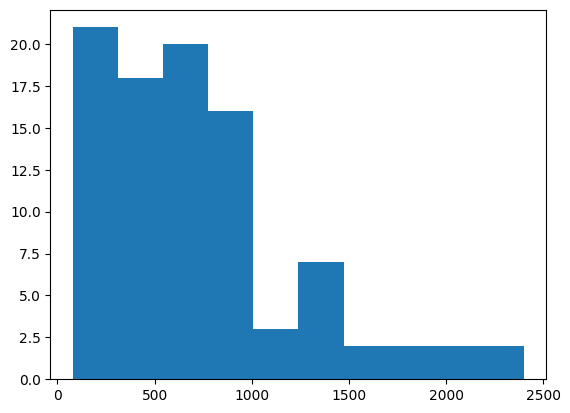

                              Продажи факт, тыс.руб  Продажи план, тыс.руб  \
Продажи факт, тыс.руб                      1.000000               0.318533   
Продажи план, тыс.руб                      0.318533               1.000000   
Дней между сделкой и оплатой              -0.093743              -0.091516   

                              Дней между сделкой и оплатой  
Продажи факт, тыс.руб                            -0.093743  
Продажи план, тыс.руб                            -0.091516  
Дней между сделкой и оплатой                      1.000000  
                 Продажи факт, тыс.руб  Продажи план, тыс.руб  \
Город                                                           
Волгоград                  1416.666667             500.000000   
Казань                     1148.571429            1000.000000   
Кемерово                   1500.000000             500.000000   
Курск                       700.000000             500.000000   
Магнитогорск                853.333333            100

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Открываем файл с данными
df = pd.read_excel('data.xlsx')

# Изучаем общую информацию о данных
print(df.head())  # Показывает первые несколько строк данных
print(df.info())  # Показывает информацию о типах данных и количестве пропусков
print(df.describe())  # Показывает статистические показатели для числовых данных

# Подготовка данных
# Удаление пропусков (если они есть)
df.dropna(inplace=True)

# Преобразование типов данных (если необходимо)
df['Дата сделки'] = pd.to_datetime(df['Дата сделки'])
df['Дата оплаты'] = pd.to_datetime(df['Дата оплаты'])
df['Дней между сделкой и оплатой'] = pd.to_numeric(df['Дней между сделкой и оплатой'], errors='coerce')

# Исследовательский анализ данных
# Проверка распределения данных
plt.hist(df['Продажи факт, тыс.руб'])
plt.show()

# Проверка корреляции между переменными
corr_matrix = df[['Продажи факт, тыс.руб', 'Продажи план, тыс.руб', 'Дней между сделкой и оплатой']].corr()
print(corr_matrix)

# Портрет менеджера каждого региона
# Группировка данных по регионам и расчет средних значений показателей
regional_data = df.groupby('Город')[['Продажи факт, тыс.руб', 'Продажи план, тыс.руб', 'Дней между сделкой и оплатой']].mean()
print(regional_data)

# Исследование статистических показателей
# Расчет среднего, медианы, дисперсии и стандартного отклонения
mean_value = df['Продажи факт, тыс.руб'].mean()
median_value = df['Продажи факт, тыс.руб'].median()
std_dev = df['Продажи факт, тыс.руб'].std()
variance = df['Продажи факт, тыс.руб'].var()
print(f'Среднее: {mean_value}, Медиана: {median_value}, Стандартное отклонение: {std_dev}, Дисперсия: {variance}')

# Проверка гипотез
# Пример проверки гипотезы о равенстве средних значений двух групп
group1 = df[df['Менеджер'] == 'С. Милер']['Продажи факт, тыс.руб']
group2 = df[df['Менеджер'] != 'С. Милер']['Продажи факт, тыс.руб']
t_stat, p_value = ttest_ind(group1, group2)
print(f'T-статистика: {t_stat}, p-значение: {p_value}')

# Общий вывод
# На основе результатов анализа данных можно сделать выводы о закономерностях и взаимосвязях между переменными.
# Например, можно выявить регионы с наибольшим потенциалом для бизнеса или определить ключевые показатели, влияющие на результативность менеджеров.

# Подготовка данных

Замените названия столбцов при необходимости (приведите к нижнему регистру); Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему; Обработайте пропуски при необходимости: Объясните, почему заполнили пропуски определённым образом или почему не стали это делать; Опишите причины, которые могли привести к пропускам; Посчитайте суммарные фактические продажи по всем городам и запишите их в отдельный столбец.

In [13]:
df = pd.read_excel('data.xlsx')

# Заменяем названия столбцов на нижний регистр
df.columns = [col.lower() for col in df.columns]

# Преобразуем данные в нужные типы
df['дата сделки'] = pd.to_datetime(df['дата сделки'], errors='coerce')
df['дата оплаты'] = pd.to_datetime(df['дата оплаты'], errors='coerce')
df['дней между сделкой и оплатой'] = pd.to_numeric(df['дней между сделкой и оплатой'], errors='coerce')

# Посчитаем суммарные фактические продажи по всем городам и запишем их в отдельный столбец
df['суммарные продажи по городу'] = df.groupby('город')['продажи факт, тыс.руб'].transform('sum')

print(df.head())

   номер заказа     канал продаж     продуктовый сегмент  менеджер  \
0          7290     Рекомендация      Ткань и аксессуары  С. Милер   
1          7291     Рекомендация      Ткань и аксессуары  С. Милер   
2          7436     Рекомендация      Ткань и аксессуары  С. Милер   
3          7484     Рекомендация      Ткань и аксессуары  С. Милер   
4          7040  Холодный звонок  Электронные устройства  М. Баили   

          название заказа  продавец            город  продажи факт, тыс.руб  \
0                NAM SUNG  Айсберг   Санкт-Петербург                    300   
1                CP Ткань  Айсберг   Санкт-Петербург                    450   
2          UNIZIN COMPANY  Айсберг   Санкт-Петербург                      0   
3                NAM SUNG  Айсберг   Санкт-Петербург                    500   
4  Электронные устройства  Alen.com     Магнитогорск                    100   

   продажи план, тыс.руб дата сделки дата оплаты  \
0                    500  2020-02-03  2020-03-25   


# Исследовательский анализ данных

Проведите исследовательский анализ данных

Посмотрите, как менеджеры выполняют план продаж.  Какова помесячная динамика выполнения плана, есть ли сезонные «просадки»? Важны ли данные за все периоды? Посмотрите, как менялись продажи по продуктовым сегментам. Выберите сегменты с наибольшими суммарными продажами и постройте распределение по месяцам. Есть ли популярные в прошлом сегменты, у которых сейчас продажи на нуле. 

Какова география продаж, какие регионы самые доходные?

Как влияет канал продаж на выполнение плана, конверсию, длительность сделки?

Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?

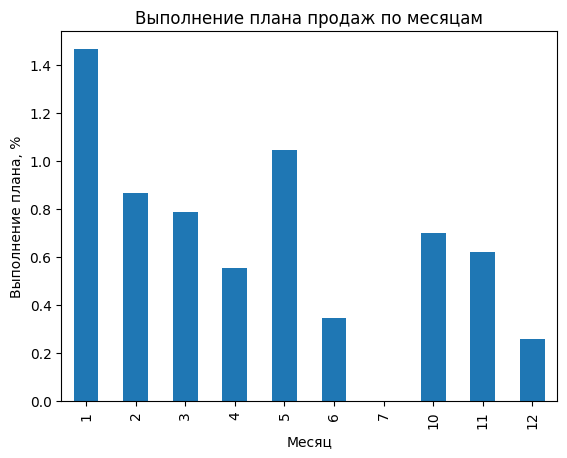

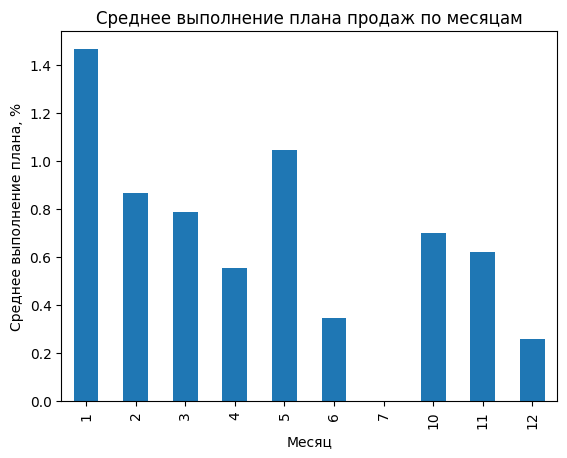

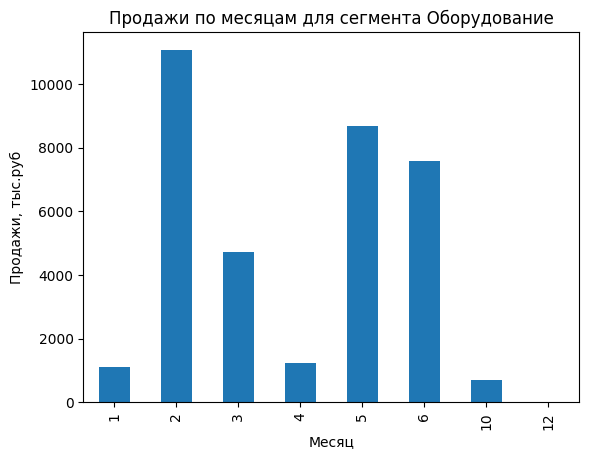

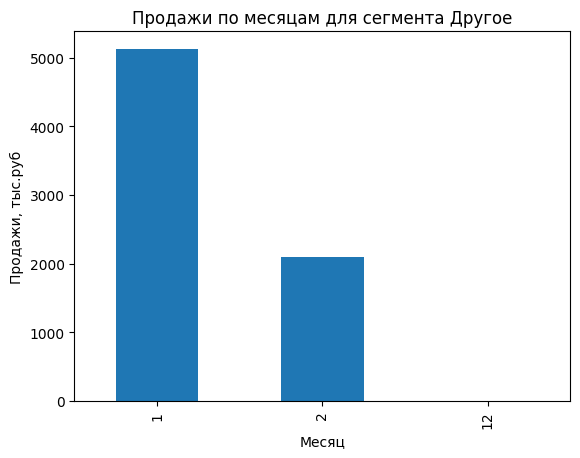

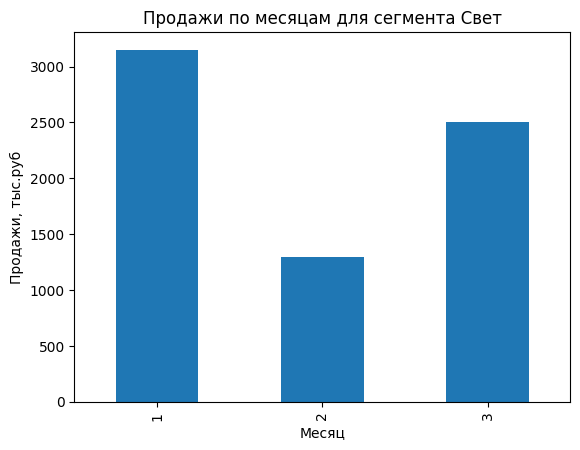

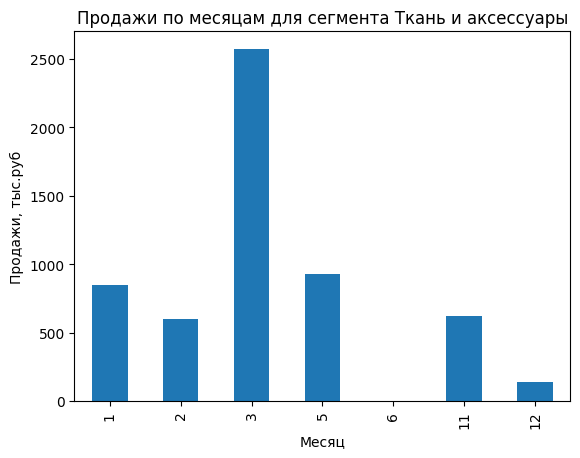

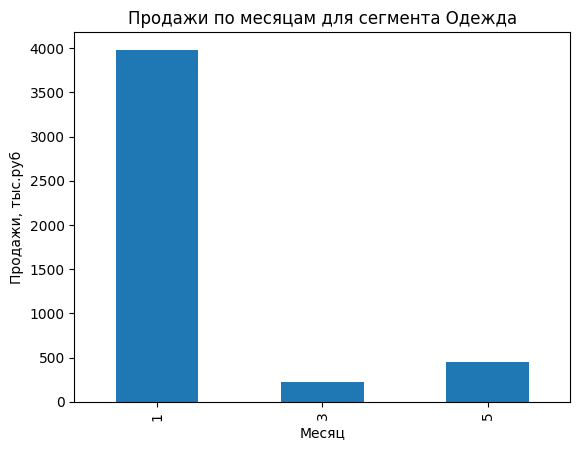

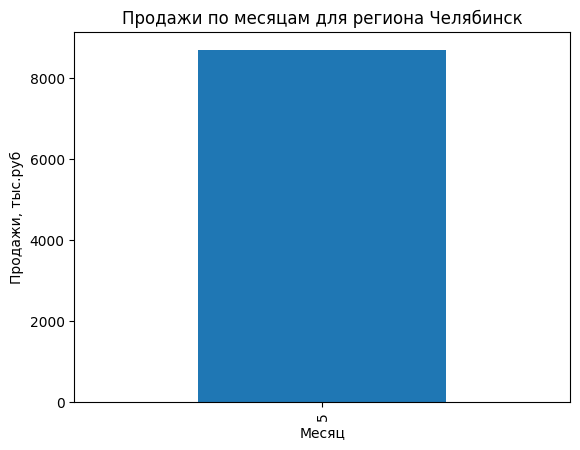

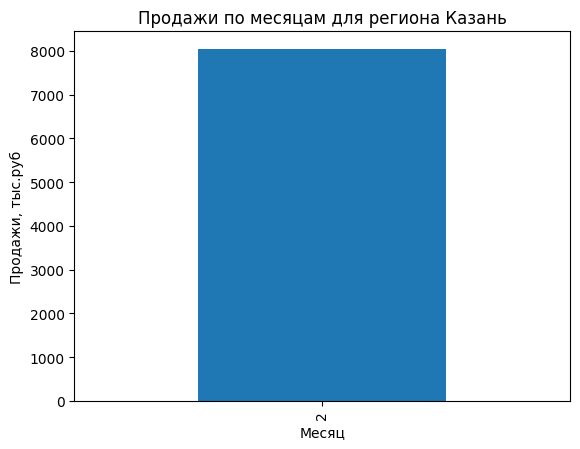

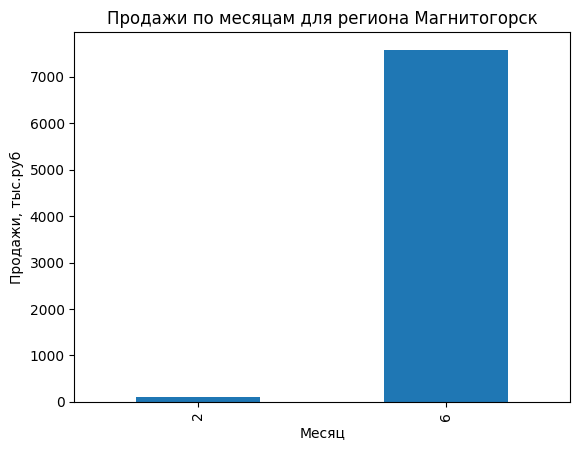

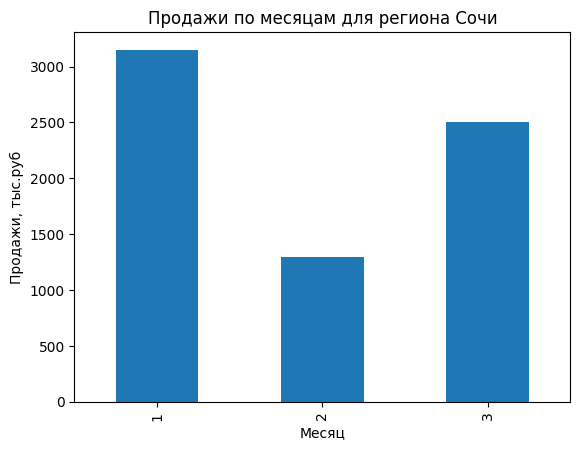

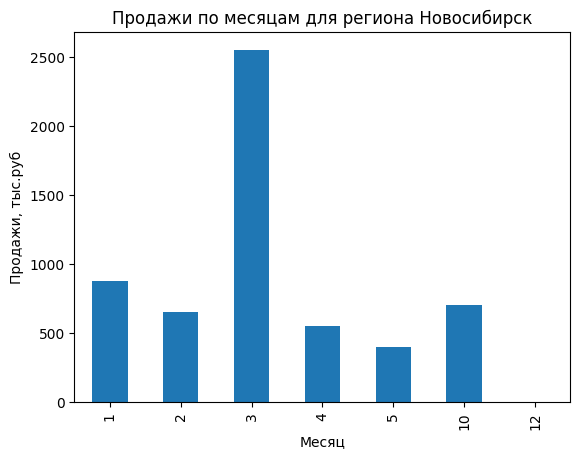

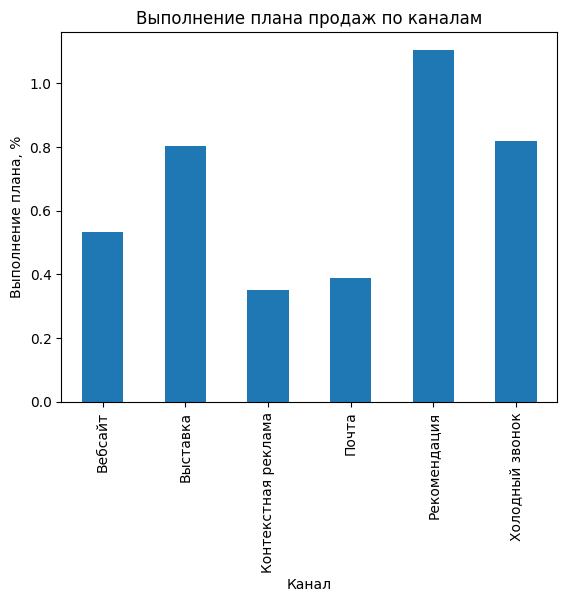

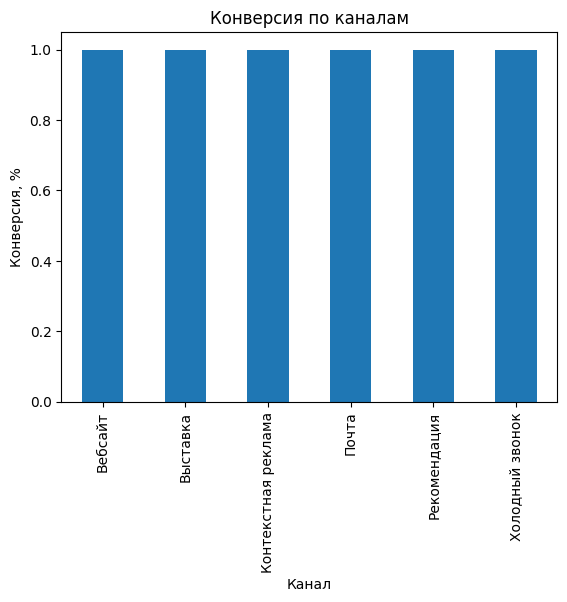

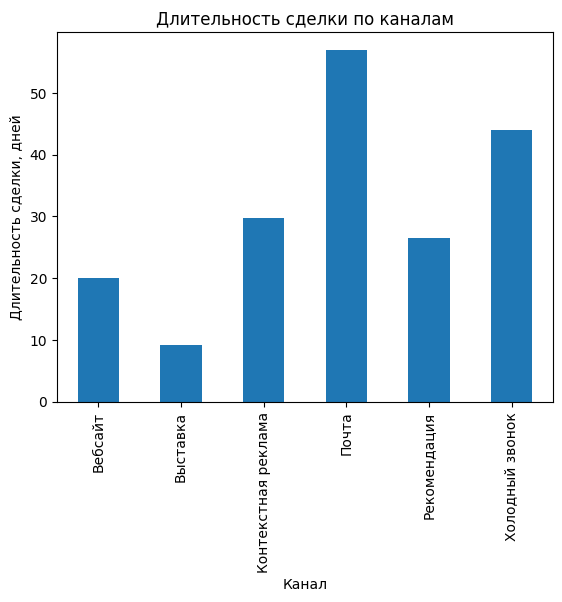

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_excel('data.xlsx')

# Выполнение плана продаж
# Преобразуем дату сделки в формат datetime и добавим столбец с месяцами
df['Дата сделки'] = pd.to_datetime(df['Дата сделки'], errors='coerce')  # преобразуем с учетом ошибок
df['Месяц'] = df['Дата сделки'].dt.month

# Преобразуем столбцы с продажами в числовые значения (если есть ошибки в данных)
df['Продажи факт, тыс.руб'] = pd.to_numeric(df['Продажи факт, тыс.руб'], errors='coerce')
df['Продажи план, тыс.руб'] = pd.to_numeric(df['Продажи план, тыс.руб'], errors='coerce')

# Посчитаем выполнение плана продаж
df['Выполнение плана'] = df['Продажи факт, тыс.руб'] / df['Продажи план, тыс.руб']

# Удалим строки с NaN в данных для корректного анализа
df = df.dropna(subset=['Выполнение плана', 'Месяц'])

# Динамика выполнения плана по месяцам
df.groupby('Месяц')['Выполнение плана'].mean().plot(kind='bar')
plt.title('Выполнение плана продаж по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Выполнение плана, %')
plt.show()

# Сезонные «просадки» - среднее выполнение плана продаж по месяцам
df.groupby('Месяц')['Выполнение плана'].mean().plot(kind='bar')
plt.title('Среднее выполнение плана продаж по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Среднее выполнение плана, %')
plt.show()

# Продажи по продуктовым сегментам
segment_sales = df.groupby('Продуктовый сегмент')['Продажи факт, тыс.руб'].sum()
top_segments = segment_sales.nlargest(5)

# Продажи по месяцам для топ-сегментов
for segment in top_segments.index:
    segment_df = df[df['Продуктовый сегмент'] == segment]
    segment_df.groupby('Месяц')['Продажи факт, тыс.руб'].sum().plot(kind='bar')
    plt.title(f'Продажи по месяцам для сегмента {segment}')
    plt.xlabel('Месяц')
    plt.ylabel('Продажи, тыс.руб')
    plt.show()

# География продаж
region_sales = df.groupby('Город')['Продажи факт, тыс.руб'].sum()
top_regions = region_sales.nlargest(5)

# Продажи по месяцам для топ-регионов
for region in top_regions.index:
    region_df = df[df['Город'] == region]
    region_df.groupby('Месяц')['Продажи факт, тыс.руб'].sum().plot(kind='bar')
    plt.title(f'Продажи по месяцам для региона {region}')
    plt.xlabel('Месяц')
    plt.ylabel('Продажи, тыс.руб')
    plt.show()

# Влияние канала продаж
channel_plan_execution = df.groupby('Канал продаж')['Выполнение плана'].mean()
channel_plan_execution.plot(kind='bar')
plt.title('Выполнение плана продаж по каналам')
plt.xlabel('Канал')
plt.ylabel('Выполнение плана, %')
plt.show()

# Конверсия по каналам
channel_conversion = df.groupby('Канал продаж')['Номер заказа'].nunique() / df.groupby('Канал продаж')['Номер заказа'].count()
channel_conversion.plot(kind='bar')
plt.title('Конверсия по каналам')
plt.xlabel('Канал')
plt.ylabel('Конверсия, %')
plt.show()

# Длительность сделки по каналам
# Преобразуем длительность сделки в числовой формат
df['Дней между сделкой и оплатой'] = pd.to_numeric(df['Дней между сделкой и оплатой'], errors='coerce')

# Рассчитываем среднюю длительность сделки по каналам
channel_deal_duration = df.groupby('Канал продаж')['Дней между сделкой и оплатой'].mean()

# График длительности сделки
channel_deal_duration.plot(kind='bar')
plt.title('Длительность сделки по каналам')
plt.xlabel('Канал')
plt.ylabel('Длительность сделки, дней')
plt.show()


# Товарные категории
product_sales = df.groupby('Продуктовый сегмент')['Продажи факт, тыс.руб'].sum()


# Общий вывод
На основании исследовательского анализа сделайте вывод относительно того, что стоит ли
 - Профилировать ли менеджеров по товарным категориям или каналам продаж (где они лучше закрывают сделки, выполняют план)
 - Расширять самые доходные каналы продаж, регионы, где есть высокий спрос

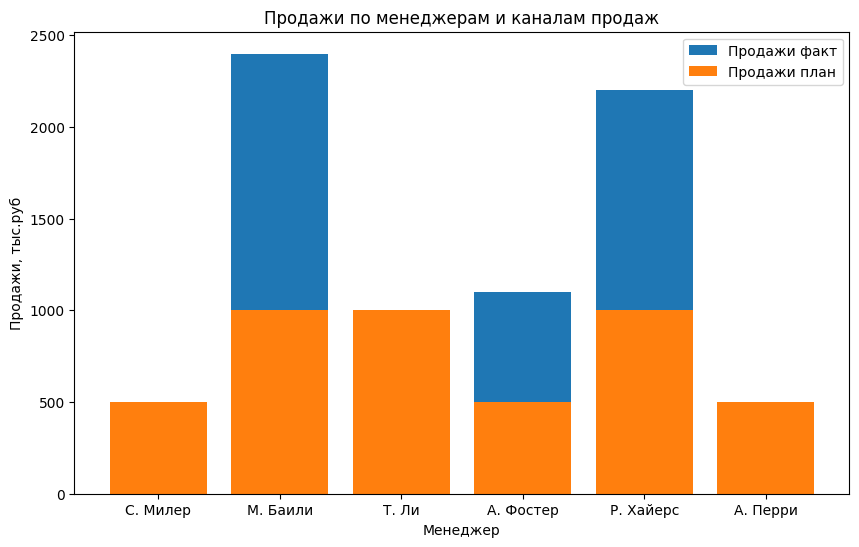

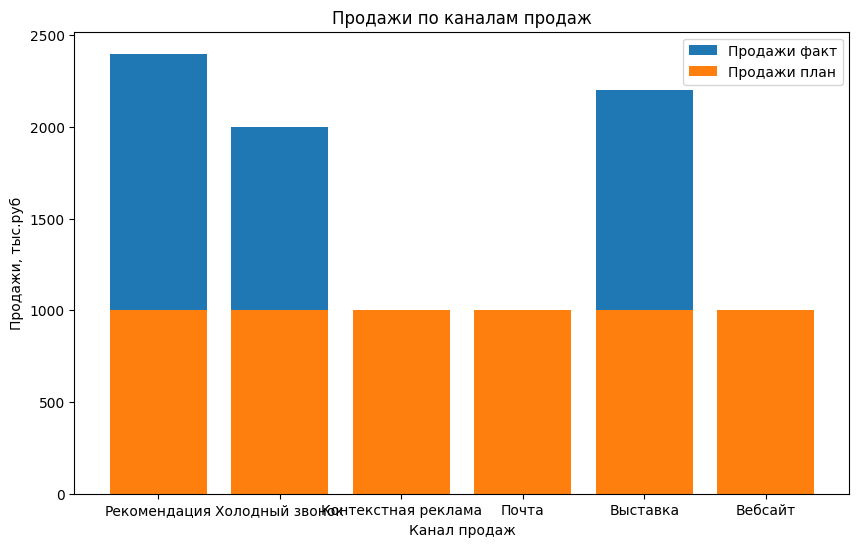

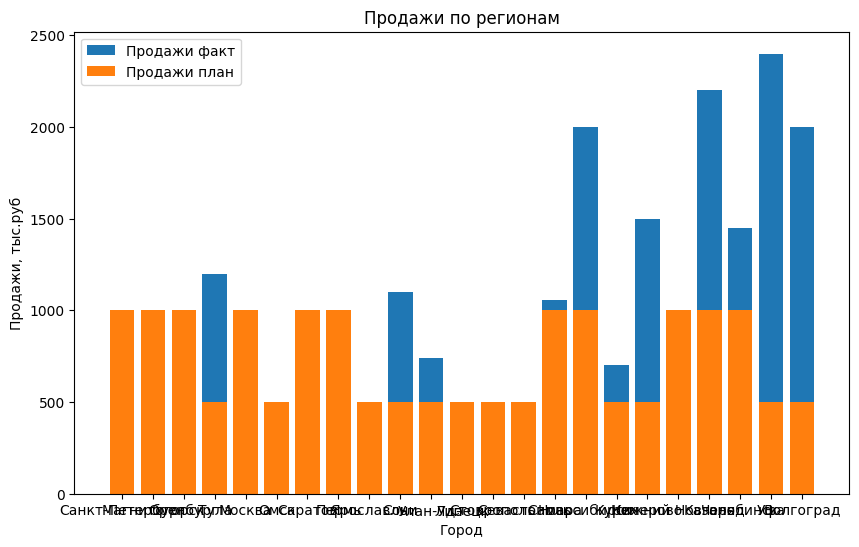

In [16]:
# График продаж по менеджерам и каналам продаж
plt.figure(figsize=(10, 6))
plt.bar(df['Менеджер'], df['Продажи факт, тыс.руб'], label='Продажи факт')
plt.bar(df['Менеджер'], df['Продажи план, тыс.руб'], label='Продажи план')
plt.xlabel('Менеджер')
plt.ylabel('Продажи, тыс.руб')
plt.title('Продажи по менеджерам и каналам продаж')
plt.legend()
plt.show()

# График продаж по каналам продаж
plt.figure(figsize=(10, 6))
plt.bar(df['Канал продаж'], df['Продажи факт, тыс.руб'], label='Продажи факт')
plt.bar(df['Канал продаж'], df['Продажи план, тыс.руб'], label='Продажи план')
plt.xlabel('Канал продаж')
plt.ylabel('Продажи, тыс.руб')
plt.title('Продажи по каналам продаж')
plt.legend()
plt.show()


# График продаж по регионам
plt.figure(figsize=(10, 6))
plt.bar(df['Город'], df['Продажи факт, тыс.руб'], label='Продажи факт')
plt.bar(df['Город'], df['Продажи план, тыс.руб'], label='Продажи план')
plt.xlabel('Город')
plt.ylabel('Продажи, тыс.руб')
plt.title('Продажи по регионам')
plt.legend()
plt.show()